# Lab 6 Unsupervised Learning, 

by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es) and [oscar.barquero@urjc.es](mailto:oscar.barquero@urjc.es)

Update Dec-2023

In this notebook we will analyze clustering methods over the Pima Indiand Diabetes dataset.

## Table of Contents

0. [Preliminaries](#preliminaries)
1. [K-means](#k_means) 
2. [Hierchical clustering](#hierarchical)
3. [Project Ideas](#ideas)

---
<a id='preliminaries'></a>
# 0 . Preliminaries

## Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from utils import plot_scatter, plot_silhouette

## Load dataset

In this lab exercise you are using the Pima Indian Diabetes data. Your hypothesis is that **there might be groups of patients with similar behavior** and you want to get some insights about them.

In [7]:
X = pd.read_csv('./data/X_resampled.csv')
y = pd.read_csv('./data/Y_resampled.csv')
feat_names = X.columns

In [14]:
print(feat_names)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


---
<a id='k_means'></a>
# 1. K-means

In [17]:
from sklearn.preprocessing import StandardScaler

X1 = X[['BMI','Glucose']].values
#X1 = StandardScaler().fit_transform(X1) # 

<font color='red'>why do we need to standardize data ? </font>

In [18]:
X1.shape

(952, 2)

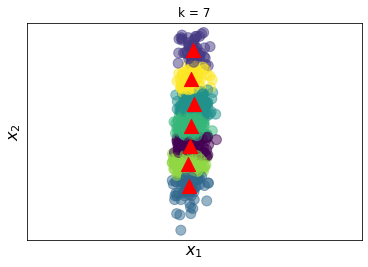

In [26]:
from sklearn.cluster import KMeans

# build the clustering model
k = 7
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X1)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X1,'k = ' + str(k), cluster_labels, centroids)


What if we use the target variable `y`?

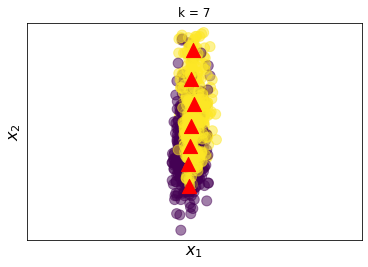

In [27]:
plot_scatter(X1,'k = ' + str(k), y.values.reshape(-1), centroids)
plt.show()

Careful here, the purpose is to group our observations not classify them (so there might be subgroups within our observations having the same or different outcome)

### How many cluster are there?

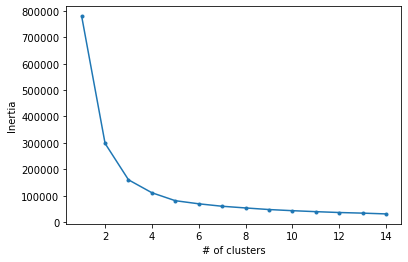

In [28]:
K = range(1,15)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

## Use the silhouette analysis


Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.[1] It was proposed by Belgian statistician Peter Rousseeuw in 1987.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 

If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. 

A clustering with an average silhouette width of over 0.7 is considered to be "strong", a value over 0.5 "reasonable" and over 0.25 "weak", but with increasing dimensionality of the data, it becomes difficult to achieve such high values because of the curse of dimensionality, as the distances become more similar. The silhouette score is specialized for measuring cluster quality when the clusters are convex-shaped, and may not perform well if the data clusters have irregular shapes or are of varying sizes.

**Play a little bit with the number of clusters**

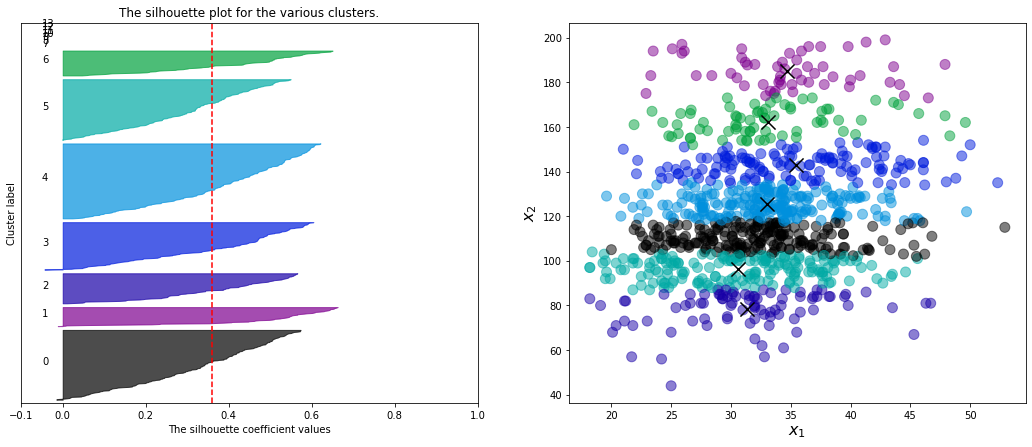

In [29]:
kmeans = KMeans(n_clusters=7, n_init=10, random_state=42).fit(X1)
plot_silhouette(X1,k,kmeans.labels_,kmeans.cluster_centers_)

### Let's analyze our observations depending on the cluster label

In [30]:
df = X.copy()
df['cluster_label'] = cluster_labels
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster_label
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,3
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,2
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,5
4,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


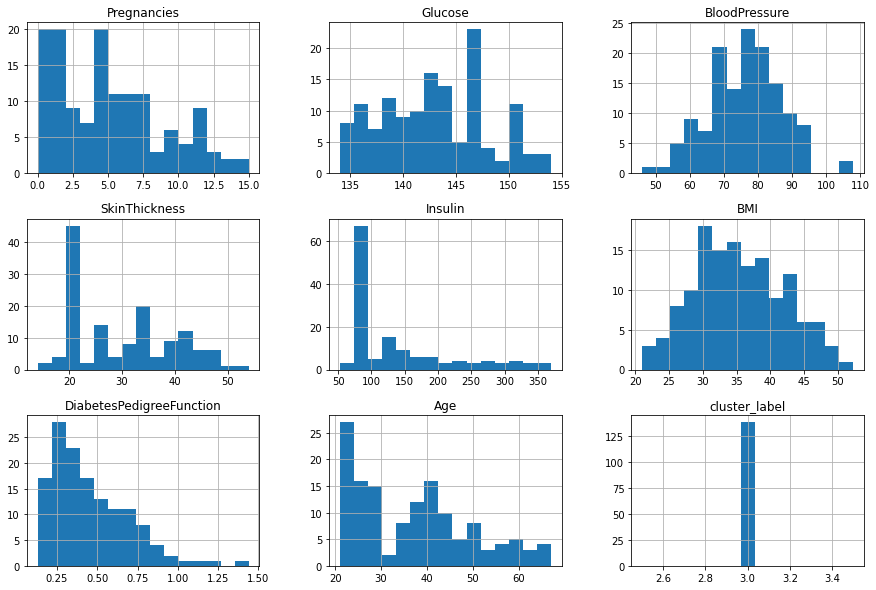

In [31]:
df[df.cluster_label==3].hist(figsize=(15,10),bins=15)
plt.show()

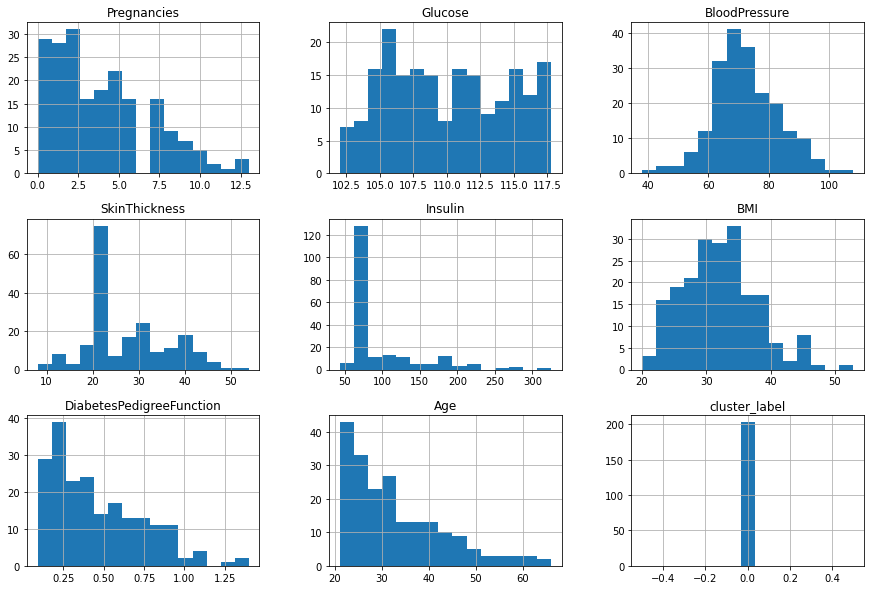

In [32]:
df[df.cluster_label==0].hist(figsize=(15,10),bins=15)
plt.show()

Observations: \
Glucose $\in$ [102, 117] against [135, 155] \
More 30's years old in cluster 0 than cluster 3

<div class = "alert alert-info">
<b>Note:</b> You can use either <b>cluster_labels</b> or <b>outcome</b> in the above representation
</div>

### PCA & K-means

Two options here:
    
1. K-means + PCA representation
2. PCA dimensionality reduction + K-means

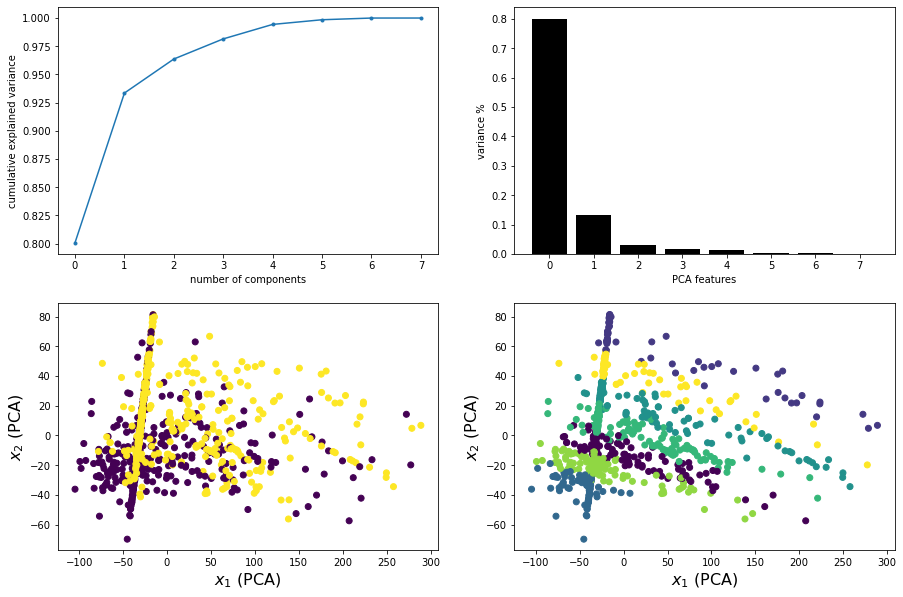

In [34]:
from sklearn.decomposition import PCA

# scaling
#X_scaled = StandardScaler().fit_transform(X)
X_scaled = X # already scaled 
y = y.values.reshape(-1)

# Number of components
pca = PCA().fit(X_scaled)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Data visualization (just 2 components)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(2,2,2)
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(range(pca.n_components_))

plt.subplot(2,2,3)
plt.scatter(X_pca[:,0],X_pca[:,1], c=y)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)

plt.subplot(2,2,4)
plt.scatter(X_pca[:,0],X_pca[:,1], c=cluster_labels)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)

plt.show()

#### Option 2:

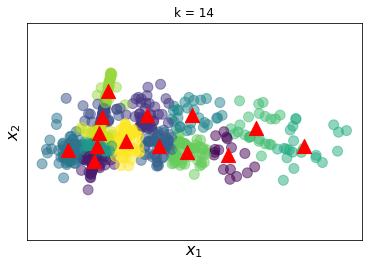

In [36]:
X_pca = PCA(n_components=2).fit_transform(X_scaled)
kmeans = KMeans(n_clusters = k, n_init=10, random_state=42).fit(X_pca)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X_pca,'k = ' + str(k), cluster_labels, centroids)
plt.show()

---
<a id='hierarchical'></a>
# 2. Hierarchical clustering

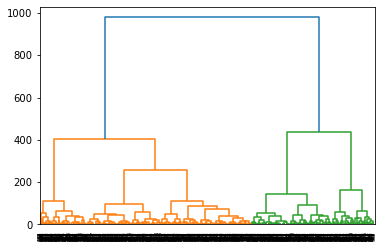

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X1, 'ward')
dendrogram(Z)
plt.show()

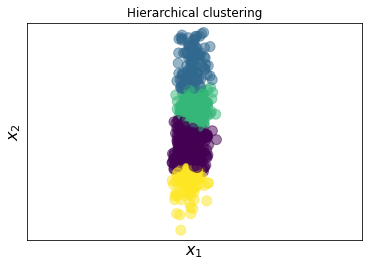

In [38]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4).fit(X1)
plot_scatter(X1,'Hierarchical clustering', agg.labels_) 

---
<a id='ideas'></a>
# Project Ideas


Here there are some ideas that you might want to consider for your project:

- Apply the k-means algorithm to your dataset, was it helpful? Did you get any insight? Comment on the number of cluster you used.

- What if you used Hierarchical clustering? Any differences? 


In all above, justify your decisions.